In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [109]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [110]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [111]:
df.shape

(45211, 17)

In [112]:
#seperate the continus and categorical
df_object = df.select_dtypes('object')
df_numerical = df.select_dtypes('int64')


In [113]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [114]:
df_object

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [120]:
from sklearn.preprocessing import LabelEncoder
for i in df_object:
    LE = LabelEncoder()
    df_object[i] = LE.fit_transform(df_object[i])

In [121]:
df_object

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3,1
45207,5,0,0,0,0,0,0,9,3,1
45208,5,1,1,0,0,0,0,9,2,1
45209,1,1,1,0,0,0,1,9,3,0


In [74]:
df_new = pd.concat([df_numerical,df_object],axis = 1)
df_new

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9,1,2,0,0,0,0,9,3,1
45207,71,1729,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1
45208,72,5715,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1
45209,57,668,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0


In [27]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df_new1 = SS.fit_transform(df_new)

In [28]:
df_n = pd.DataFrame(df_new1)
df_n

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,-0.103820,-0.275762,1.036362,-0.13549,0.893915,-0.436803,1.514306,0.823773,0.444898
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,1.424008,1.368372,-0.300556,-0.13549,0.893915,-0.436803,1.514306,0.823773,0.444898
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,-0.714951,-0.275762,-0.300556,-0.13549,0.893915,2.289359,1.514306,0.823773,0.444898
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,-1.020516,-0.275762,2.373280,-0.13549,0.893915,-0.436803,1.514306,0.823773,0.444898
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,2.035139,1.368372,2.373280,-0.13549,-1.118674,-0.436803,1.514306,0.823773,0.444898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,1.424008,-0.275762,1.036362,-0.13549,-1.118674,-0.436803,-0.713012,1.156344,0.444898
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,0.201746,-1.919895,-1.637474,-0.13549,-1.118674,-0.436803,-0.713012,1.156344,0.444898
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,0.201746,-0.275762,-0.300556,-0.13549,-1.118674,-0.436803,-0.713012,1.156344,-0.566175
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,-1.020516,-0.275762,-0.300556,-0.13549,-1.118674,-0.436803,0.400647,1.156344,0.444898


In [75]:
X = df_n
Y = pd.DataFrame(df_new.iloc[:,-1])

In [76]:
Y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [34]:
X 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,-0.103820,-0.275762,1.036362,-0.13549,0.893915,-0.436803,1.514306,0.823773,0.444898
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,1.424008,1.368372,-0.300556,-0.13549,0.893915,-0.436803,1.514306,0.823773,0.444898
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,-0.714951,-0.275762,-0.300556,-0.13549,0.893915,2.289359,1.514306,0.823773,0.444898
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,-1.020516,-0.275762,2.373280,-0.13549,0.893915,-0.436803,1.514306,0.823773,0.444898
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,2.035139,1.368372,2.373280,-0.13549,-1.118674,-0.436803,1.514306,0.823773,0.444898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,1.424008,-0.275762,1.036362,-0.13549,-1.118674,-0.436803,-0.713012,1.156344,0.444898
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,0.201746,-1.919895,-1.637474,-0.13549,-1.118674,-0.436803,-0.713012,1.156344,0.444898
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,0.201746,-0.275762,-0.300556,-0.13549,-1.118674,-0.436803,-0.713012,1.156344,-0.566175
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,-1.020516,-0.275762,-0.300556,-0.13549,-1.118674,-0.436803,0.400647,1.156344,0.444898


In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

In [78]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(33908, 16) (11303, 16) (33908, 1) (11303, 1)


In [79]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)
LR.score(X_train,Y_train)


0.8918249380677127

In [80]:
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score,classification_report
print("Training Accuracy",accuracy_score(y_pred_train,Y_train).round(2))
print("Testing Accuracy",accuracy_score(y_pred_test,Y_test).round(2))

Training Accuracy 0.89
Testing Accuracy 0.89


In [82]:
result = classification_report(y_pred_train,Y_train)


In [83]:
print(result)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     32502
           1       0.21      0.60      0.31      1406

    accuracy                           0.89     33908
   macro avg       0.60      0.75      0.63     33908
weighted avg       0.95      0.89      0.92     33908



In [84]:
y_prd = pd.DataFrame(y_pred_train)

In [85]:
y_prd

,0
0,0
1,0
2,0
3,0
4,0
...,...
33903,1
33904,0
33905,0
33906,0


In [86]:
Y_train

,y
41626,0
31347,0
22563,0
37243,0
32259,0
...,...
11284,1
44732,0
38158,0
860,0


In [87]:
LR.predict_proba(X_train)[:,1]

array([0.12694676, 0.02471285, 0.12609574, ..., 0.06707263, 0.03272825,
       0.00797678])

Text(0, 0.5, 'True positive rate')

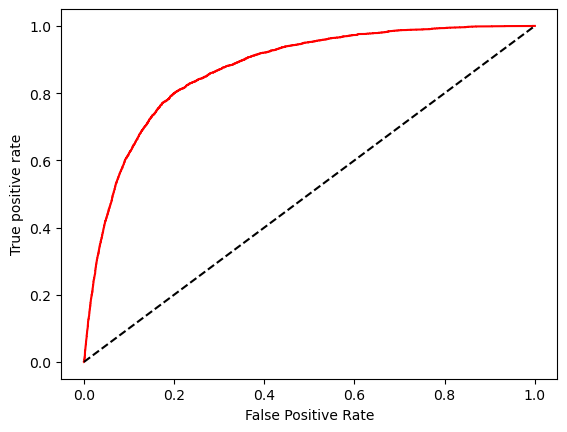

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(Y_train,LR.predict_proba(X_train)[:,1])

auc = roc_auc_score(Y_train,y_prd)
plt.plot(fpr,tpr,color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True positive rate")


In [89]:
auc

0.5968340267989961

In [90]:
#For best threshold value

In [98]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(LR.predict_proba(X_train)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(Y_train,y_pred,normalize = True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis = 1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by = "accuracy", ascending = False, inplace = True)
accuracy_ls.head(10)

,thresholds,accuracy
1006,0.394208,0.893860
1005,0.394685,0.893830
1007,0.394071,0.893830
1004,0.395313,0.893801
994,0.396436,0.893771
993,0.396873,0.893771
1014,0.392489,0.893771
1003,0.395332,0.893771
986,0.397882,0.893742
988,0.397706,0.893742


In [100]:
from numpy import argmax
J = tpr-fpr
ix = argmax(J)

b = thresholds[ix]

print("Best threshold = %f" % (b))

Best threshold = 0.123219


In [96]:
from sklearn.model_selection import KFold,cross_val_score
K = KFold(n_splits = 5)
result = cross_val_score(LR,X,Y,cv = K)
print(result)

[0.96649342 0.9491263  0.93917275 0.88111037 0.69199292]


In [97]:
print(np.mean(result).round(2))

0.89
